In [6]:
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv("../Data/airways.csv", index_col=0)

In [10]:
data.head()

,route,id,navaid,latitude,longitude
0,A1,1,HCE,33.114350,139.788483
1,A1,2,KARTA,33.193211,138.972397
2,A1,3,KEC,33.447742,135.794494
3,A1,4,ALBAT,33.364503,135.441514
4,A1,5,HALON,33.248769,134.997222


In [11]:
india_min_longitude = 68.17  
india_max_longitude = 97.25  
india_min_latitude = 6.4 
india_max_latitude = 35.4

def filter_india(df):
  return df[(df['longitude'] >= india_min_longitude) & 
            (df['longitude'] <= india_max_longitude) & 
            (df['latitude'] >= india_min_latitude) & 
            (df['latitude'] <= india_max_latitude)]

In [12]:
india_data=filter_india(data)

In [13]:
india_data.head()

,route,id,navaid,latitude,longitude
564,A201,1,LKN,26.758556,80.894417
565,A201,2,BODOG,26.026944,83.581944
566,A201,3,PPT,25.590417,85.089917
567,A201,4,MONDA,25.350556,86.437778
568,A201,5,BIKIK,24.779722,87.797500


/home/sankalp/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/sankalp/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/sankalp/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/sankalp/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/sankalp/.local/lib/python3.10/site-packag

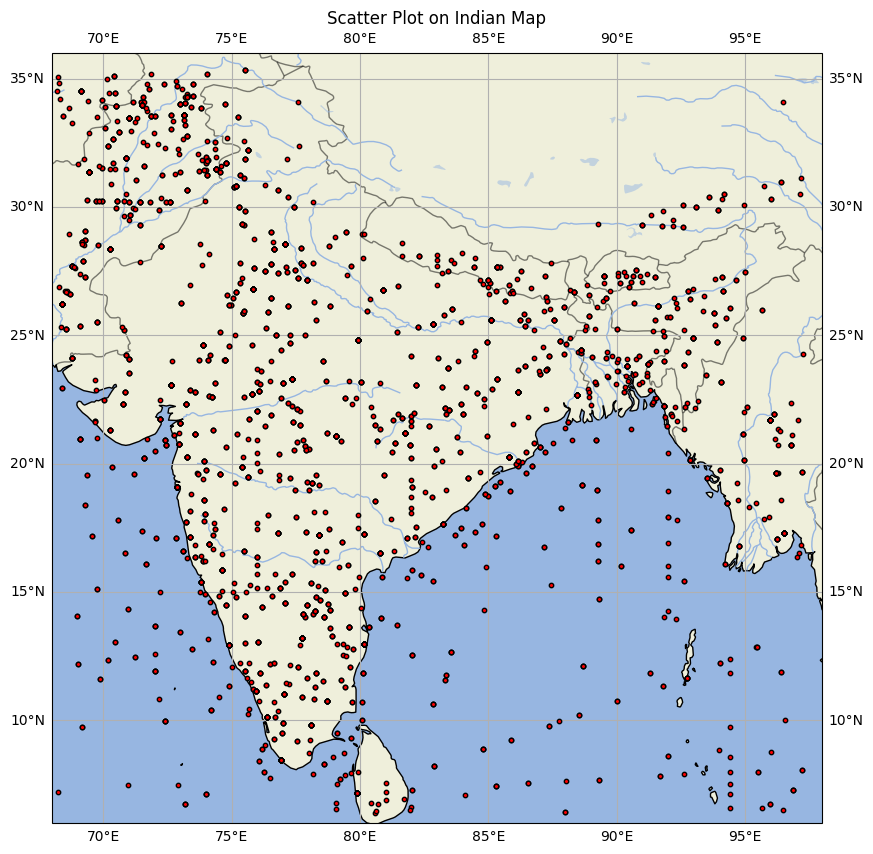

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


latitudes = india_data['latitude'].values
longitudes = india_data['longitude'].values


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())


ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())


ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)

ax.gridlines(draw_labels=True)


plt.title('Scatter Plot on Indian Map')


plt.show()

In [16]:
india_data=india_data.set_index('route')


In [17]:
india_data.head()

,id,navaid,latitude,longitude
route,,,,
A201,1,LKN,26.758556,80.894417
A201,2,BODOG,26.026944,83.581944
A201,3,PPT,25.590417,85.089917
A201,4,MONDA,25.350556,86.437778
A201,5,BIKIK,24.779722,87.797500


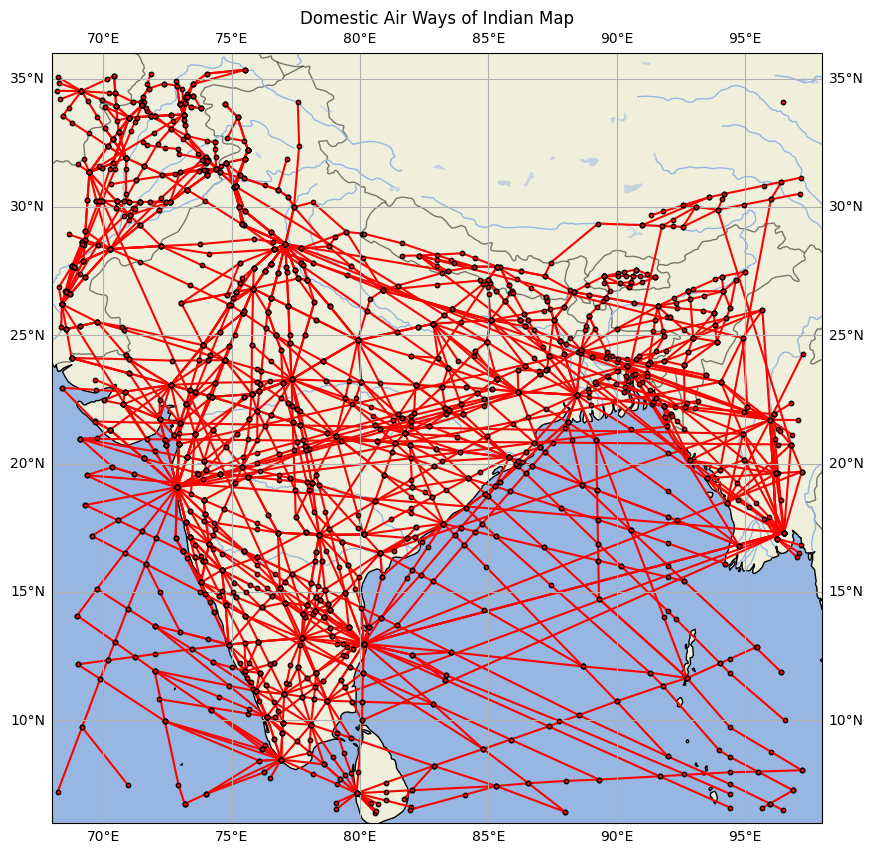

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())


ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())


for route in india_data.index.unique().values:
    try : 
        latitudes = india_data.loc[route]['latitude'].values 
        longitudes = india_data.loc[route]['longitude'].values
    except : 
        latitudes =  [india_data.loc[route]['latitude']]
        longitudes = [india_data.loc[route]['longitude']]
    ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)
    ax.plot(longitudes, latitudes, color='red')


ax.gridlines(draw_labels=True)


plt.title('Domestic Air Ways of Indian Map')
plt.savefig("DomesticAirWays.png")

plt.show()

In [19]:
navaid_counts = india_data['navaid'].value_counts()
has_single_occurrence = navaid_counts == 1

india_data['has_one_occurrence'] = india_data['navaid'].apply(lambda x: has_single_occurrence[x])

In [20]:
routes_to_drop = [] # drop routes with only one id and no intersection 
for route in india_data.index.unique().values : 
    if isinstance(india_data.loc[route] , pd.Series) and india_data.loc[route].has_one_occurrence : 
        routes_to_drop.append(route)
print(routes_to_drop)

['L888']


In [21]:
routes = india_data.drop(index=routes_to_drop)